# Introduction to image processing
[Numpy](https://numpy.org) is a library for processing arrays and matrices of numerical data. Images are exactly that.

See also
* [Image manipulation and processing using Numpy and Scipy by Emmanuelle Gouillart and Gaël Varoquaux](https://scipy-lectures.org/advanced/image_processing/index.html#basic-image)
* [Tutorial on image segmentation with scikit-image](https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html)

Let's start by defining an image as a two dimensional array; a matrix.

In [113]:
raw_image_array = [
    [1, 0, 2, 1, 0, 0, 0],
    [0, 3, 1, 0, 1, 0, 1],
    [0, 5, 5, 1, 0, 1, 0],
    [0, 6, 6, 5, 1, 0, 2],
    [0, 0, 5, 6, 3, 0, 1],
    [0, 1, 2, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1, 0]
]

We can turn this matrix into a numpy array.

In [131]:
import numpy as np

image = np.asarray(raw_image_array)

In [133]:
image

array([[1, 0, 2, 1, 0, 0, 0],
       [0, 3, 1, 0, 1, 0, 1],
       [0, 5, 5, 1, 0, 1, 0],
       [0, 6, 6, 5, 1, 0, 2],
       [0, 0, 5, 6, 3, 0, 1],
       [0, 1, 2, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0]])

We can also create empty images containing [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) and [random](https://numpy.org/doc/1.16/reference/generated/numpy.random.random.html#numpy.random.random) images, which is sometimes good for playing with algorithms.

In [141]:
image_size = (5, 10)

np.zeros(image_size)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [142]:
np.zeros((5, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [143]:
np.random.random((3, 5))

array([[0.14803448, 0.27247962, 0.55121093, 0.89935923, 0.30669354],
       [0.41304136, 0.43326849, 0.92224892, 0.1212822 , 0.64807495],
       [0.98249118, 0.65109504, 0.17745386, 0.86902487, 0.31045206]])

## Image segmentation
A very basic algorithm for separating low intensity regions from high intensity regions in the image is thresholding.
We will now make a new image containing `True` and `False` as pixel values depending on if the original image had intensity lower or higher a given threshold. As this image has just two different pixel values, it is a binary image:

In [115]:
threshold = 4

binary_image = image > threshold

In [116]:
binary_image

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False,  True,  True, False, False, False, False],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True,  True, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

## Pixel statistics
Numpy also allows us to derive basic descriptive statistical measurements from images such as mean, minimum, maximum and standard deviation of intensities:

In [117]:
np.mean(image)

1.3265306122448979

In [118]:
np.min(image)

0

In [119]:
np.max(image)

6

In [120]:
np.std(image)

1.8448798987737995

In [125]:
image.std()

1.8448798987737995

## Image visualization
For visualizing images, we use the [scikit-image](https://scikit-image.org) library.

C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


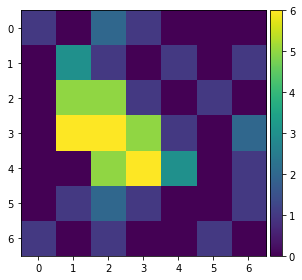

In [129]:
from skimage.io import imshow

imshow(image)

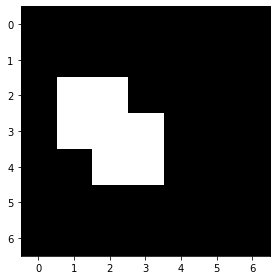

In [130]:
imshow(binary_image)

[Matplotlib](https://matplotlib.org/) might be more flexible when visualizing images, e.g. for drawing outlines around regions of interest:

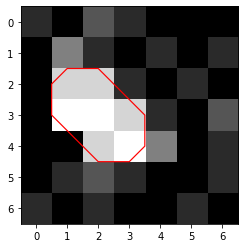

In [156]:
import matplotlib.pyplot as plt

# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(binary_image, [0.5], linewidths=1.2, colors='r')